In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='unicode_escape')
df.shape

(995, 28)

In [11]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [18]:
df.duplicated().sum()

0

In [25]:
df.isnull().sum()

rank                                  0
Youtuber                              0
subscribers                           0
video views                           0
category                             46
Title                                 0
uploads                               0
Country                             122
Abbreviation                        122
channel_type                         30
video_views_rank                      1
country_rank                        116
channel_type_rank                    33
video_views_for_the_last_30_days     56
lowest_monthly_earnings               0
highest_monthly_earnings              0
lowest_yearly_earnings                0
highest_yearly_earnings               0
created_year                          5
created_month                         5
created_date                          5
dtype: int64

In [22]:
Null_value_perecntage = (df.isnull().sum() / df.shape[0]) * 100
Null_value_perecntage

rank                                        0.000000
Youtuber                                    0.000000
subscribers                                 0.000000
video views                                 0.000000
category                                    4.623116
Title                                       0.000000
uploads                                     0.000000
Country                                    12.261307
Abbreviation                               12.261307
channel_type                                3.015075
video_views_rank                            0.100503
country_rank                               11.658291
channel_type_rank                           3.316583
video_views_for_the_last_30_days            5.628141
lowest_monthly_earnings                     0.000000
highest_monthly_earnings                    0.000000
lowest_yearly_earnings                      0.000000
highest_yearly_earnings                     0.000000
subscribers_for_last_30_days               33.

In [23]:
# Drop unwated columns

df.drop(['Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude', 'subscribers_for_last_30_days'], axis = 1, inplace = True)

In [26]:
# Fill categorical columns nan value with 'not available'

df[['category', 'Abbreviation', 'channel_type', 'Country']] = df[['category', 'Abbreviation', 'channel_type', 'Country']].fillna('Not Available')

In [27]:
#Replacing missing values will the mode

df['video_views_for_the_last_30_days'] = df['video_views_for_the_last_30_days'].fillna(df['video_views_for_the_last_30_days'].mode()[0])
df['country_rank'] = df['country_rank'].fillna(df['country_rank'].mode()[0])
df['channel_type_rank'] = df['channel_type_rank'].fillna(df['channel_type_rank'].mode()[0])

In [29]:
df.isnull().sum().sum()

16

In [30]:
# Drop remaining missing values
df.dropna(inplace = True)

In [31]:
df.isnull().sum().sum()

0

In [38]:
# Change date columns to date type
df.created_date = pd.to_datetime(df.created_date)

In [39]:
df.shape

(990, 21)

In [40]:
# Create a Copy

df_clean = df.copy()


In [41]:
# Creating a list of all countries in their different continents.

Africa = ["Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cabo Verde","Cameroon","Central African Republic",
          "Chad","Comoros","Congo, Dem. Rep", "Congo, Rep.","Cote d'Ivoire","Djibouti","Egypt","Equatorial Guinea","Eritrea",
          "Eswatini (formerly Swaziland)","Ethiopia","Gabon","Gambia","Ghana","Guinea","Guinea-Bissau","Kenya", "Lesotho",
          "Liberia",'Libya',"Madagascar","Malawi","Mali","Mauritania","Mauritius","Morocco","Mozambique","Namibia",
          "Niger","Nigeria","Rwanda","Sao Tome and Principe","Senegal","Seychelles","Sierra Leone","Somalia","South Africa",
          "South Sudan","Sudan","Tanzania""Togo","Tunisia","Uganda","Zambia","Zimbabwe"]

Europe = ["Albania","Andorra", "Armenia","Austria","Azerbaijan","Belarus","Belgium","Bosnia and Herzegovina",
          "Bulgaria","Croatia","Cyprus","Czechia","Denmark","Estonia","Finland","France","Georgia","Germany",
          "Greece","Hungary","Iceland","Ireland","Italy","Kazakhstan","Kosovo","Latvia","Liechtenstein","Lithuania",
          "Luxembourg","Malta","Moldova","Monaco","Montenegro","Netherlands","Macedonia, FYR","Norway","Poland","Portugal",
          "Romania","Russia","San Marino","Serbia","Slovakia","Slovenia","Spain","Sweden","Switzerland","Turkey",
          "Ukraine","United Kingdom","Vatican City"]

Asia = ["Afghanistan","Armenia","Azerbaijan","Bahrain","Bangladesh", "Bhutan","Brunei","Cambodia","China","Cyprus",
        "Georgia","India","Indonesia","Iran","Iraq","Israel","Japan","Jordan","Kazakhstan","Kuwait","Kyrgyzstan","Laos",
        "Lebanon","Malaysia","Maldives","Mongolia","Myanmar","Nepal","North Korea","Oman","Pakistan","Palestine","Philippines",
        "Qatar","Russia","Saudi Arabia","Singapore","South Korea","Sri Lanka","Syria","Taiwan","Tajikistan","Thailand",
        "Timor-Leste","Turkey","Turkmenistan","United Arab Emirates","Uzbekistan","Vietnam","Yemen"]

North_America = ["Antigua and Barbuda","Bahamas","Barbados","Belize","Canada","Costa Rica","Cuba","Dominica",
                 "Dominican Republic","El Salvador","Grenada","Guatemala","Haiti","Honduras","Jamaica","Mexico",
                 "Nicaragua","Panama","Saint Vincent and the Grenadines","United States"]

South_America = ["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","Guyana","Paraguay","Peru","Suriname",
                 "Uruguay","Venezuela"]

Australia_and_Oceania = ["Australia","Fiji","Kiribati","Marshall Islands","Micronesia","Nauru","New Zealand","Palau",
                       "Papua New Guinea","Samoa","Solomon Islands","Tonga","Tuvalu","Vanuatu"]


In [42]:
# creating a function to fill the continent column with the appropriate continent of the country

def result(Country):
  if Country in Africa:
    return 'Africa'
  elif Country in Europe:
    return 'Europe'
  elif Country in Asia:
    return 'Asia'
  elif North_America:
    return 'North_America'
  elif South_America:
    return 'South_America'
  else:
    return 'Australia_and_Oceania'

# Applying the function into the df

df_clean['continent'] = df_clean.Country.apply(lambda x:result(x))

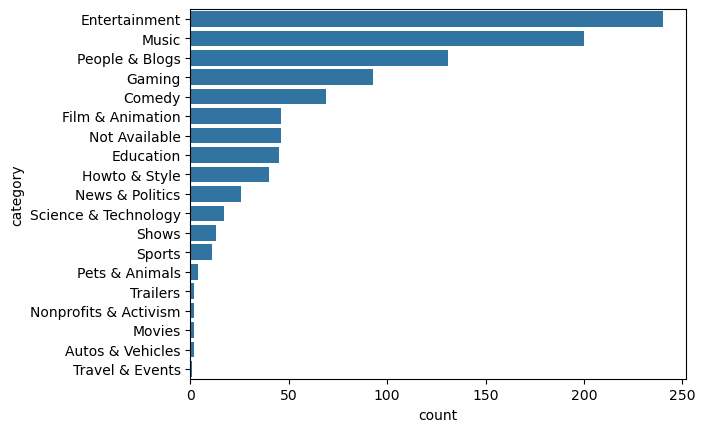

In [47]:
# What category have the most activity
base_color = sns.color_palette()[0]

#Viz
category = df_clean['category'].value_counts().index
sns.countplot(data = df_clean, y = 'category', color = base_color, order = category)

plt.show()

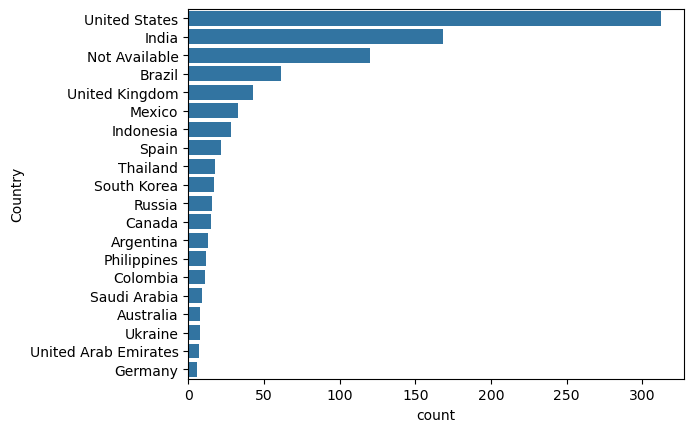

In [50]:
# What Countries have the highest amount of YT activity
'''
'rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'created_year', 'created_month',
       'created_date'
'''

#Visualization
Country = df_clean['Country'].value_counts().head(20).index
sns.countplot(data = df_clean, y = 'Country', color = base_color, order = Country)

plt.show()

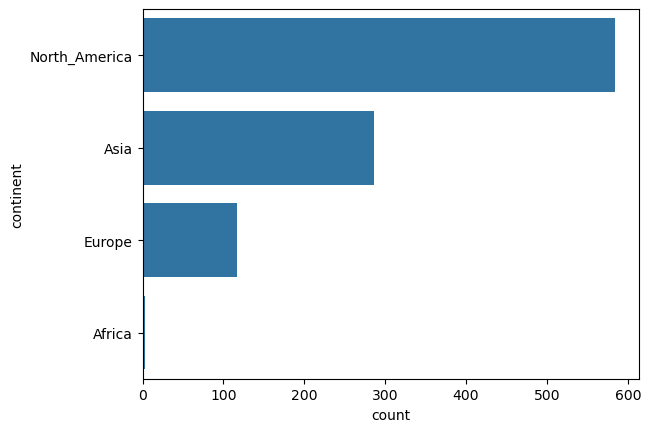

In [52]:
# What continent have the highest amount of YT activity


continent = df_clean['continent'].value_counts().head(20).index
sns.countplot(data = df_clean, y = 'continent', color = base_color, order = continent)
plt.show()

In [53]:
# Measures of Central tendancy Yearly earnings

mean_y = df_clean['highest_yearly_earnings'].mean()
median_y = df_clean['highest_yearly_earnings'].median()
mode_y = df_clean['highest_yearly_earnings'].mode()

print('Mean = '+str(mean_y))
print('Median = '+str(median_y))
print('Mode = '+str(mode_y))

Mean = 7117580.65649495
Median = 2600000.0
Mode = 0    0.0
Name: highest_yearly_earnings, dtype: float64


In [55]:
# Step 1
# Measures of central tendancy Monthly earnings

columns = [
   'rank', 'subscribers', 'video views', 'uploads', 'lowest_monthly_earnings',
   'highest_monthly_earnings', 'lowest_yearly_earnings','highest_yearly_earnings'
]

In [56]:
#Step 2
# Measures of Central tendancy Yearly earnings

for column in columns:
  print("\n\n")
  print(column, "mean is: "+ str(round(df_clean[column].mean(), 2)))
  print(column, "meadian is: "+ str(df_clean[column].median()))
  print(column, "mode is: " + str(df_clean[column].mode()))




rank mean is: 497.77
rank meadian is: 497.5
rank mode is: 0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      26
26      27
27      28
28      29
29      30
30      31
31      32
32      33
33      34
34      35
35      36
36      37
37      38
38      39
39      40
40      41
41      42
42      43
43      44
44      45
45      46
46      47
47      48
48      49
49      50
50      51
51      52
52      53
53      54
54      55
55      56
56      57
57      58
58      59
59      60
60      61
61      62
62      63
63      64
64      65
65      66
66      67
67      68
68      69
69      70
70      71
71      72
72      73
73      74
74      75
75      76
76      77
77      78
78      79
79      80
80      81
81      82
82      83
83      84
84      85
85  

/tmp/ipykernel_3844/2734562512.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['subscribers'])


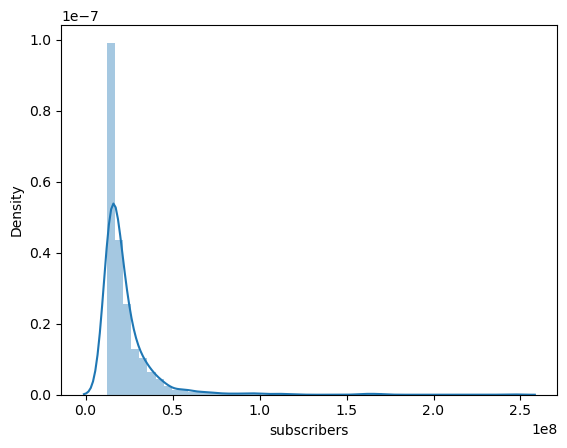

In [57]:
# Distribution of subscribers
'''
 'rank', 'subscribers', 'video views', 'uploads', 'lowest_monthly_earnings',
   'highest_monthly_earnings', 'lowest_yearly_earnings','highest_yearly_earnings'
   '''
sns.distplot(df_clean['subscribers'])
plt.show()


Top ten values for uploads is:{0: 38, 1: 26, 2: 9, 3: 8, 6: 6, 982: 4, 287: 4, 8: 4, 744: 3, 975: 3}



/tmp/ipykernel_3844/1183178598.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[column])


uploads
0    38
1    26
2     9
3     8
6     6
Name: count, dtype: int64

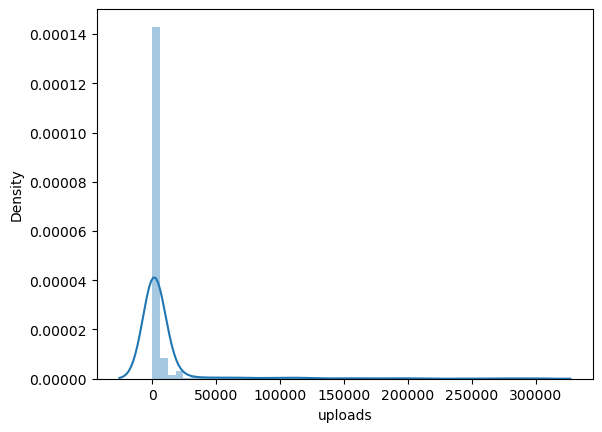

In [59]:
# Distribution of uploads

def uni_viz(dataframe, column, bin=None):
  sns.distplot(dataframe[column])

  values = dataframe[column].value_counts(ascending = False)
  print('Top ten values for {} is:{}\n'.format(column, values.head(10).to_dict()))

  return values.head(5)

uni_viz(df_clean,'uploads')


/tmp/ipykernel_3844/1183178598.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[column])


Top ten values for highest_yearly_earnings is:{0.0: 74, 1300000.0: 21, 2100000.0: 17, 1400000.0: 15, 1200000.0: 13, 1100000.0: 12, 2300000.0: 12, 1700000.0: 12, 2200000.0: 12, 1500000.0: 12}



highest_yearly_earnings
0.0          74
1300000.0    21
2100000.0    17
1400000.0    15
1200000.0    13
Name: count, dtype: int64

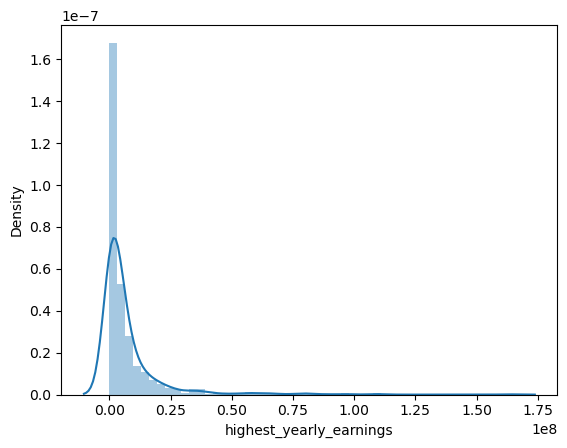

In [60]:
# Distribution of yearly earnings
uni_viz(df_clean,'highest_yearly_earnings')

Top ten values for subscribers is:{12500000: 22, 12400000: 20, 15000000: 17, 14500000: 16, 15100000: 16, 14400000: 15, 13100000: 14, 13300000: 14, 12700000: 13, 13200000: 12}



/tmp/ipykernel_3844/1183178598.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[column])


subscribers
12500000    22
12400000    20
15000000    17
14500000    16
15100000    16
Name: count, dtype: int64

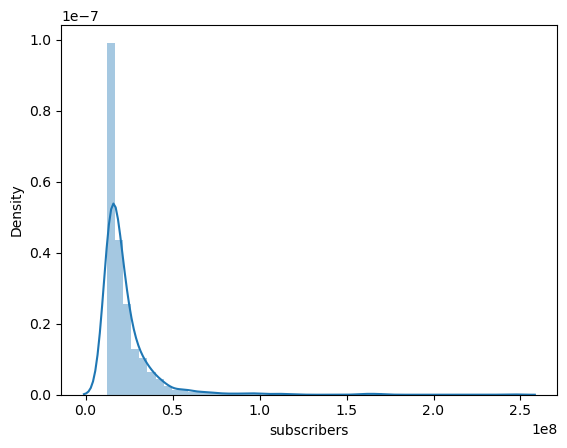

In [61]:
# Subscribers again
uni_viz(df_clean,'subscribers')

Text(0, 0.5, 'subscribers')

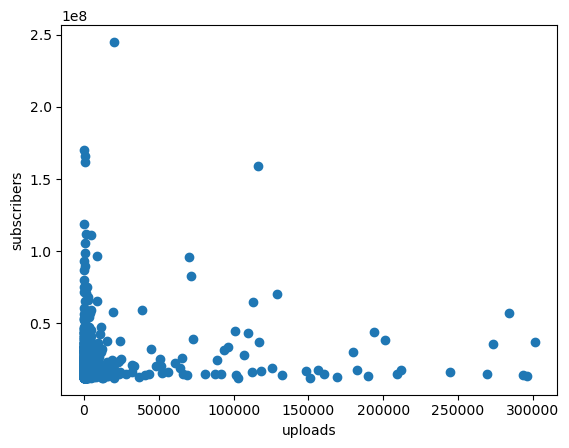

In [62]:
# Relationship between Uploads and Subs

'''
 'rank', 'subscribers', 'video views', 'uploads', 'lowest_monthly_earnings',
   'highest_monthly_earnings', 'lowest_yearly_earnings','highest_yearly_earnings'
   '''
plt.scatter(data = df_clean, x='uploads' , y='subscribers' )
plt.xlabel('uploads')
plt.ylabel('subscribers')

Text(0, 0.5, 'highest_yearly_earnings')

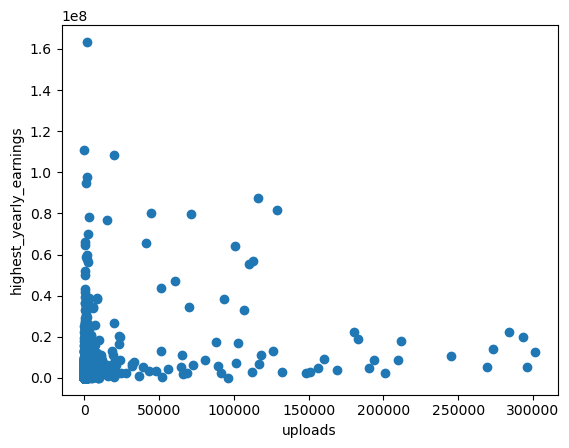

In [63]:
# Relationship between Uploads and earnings

plt.scatter(data = df_clean, x='uploads' , y='highest_yearly_earnings' )
plt.xlabel('uploads')
plt.ylabel('highest_yearly_earnings')

Text(0, 0.5, 'subscribers')

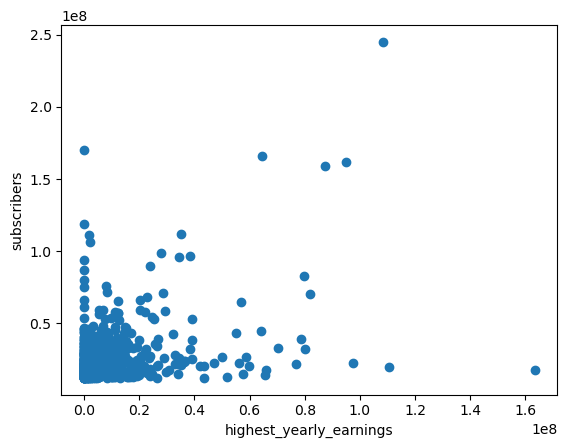

In [64]:
# Relationship between Subs and Yearly earnings
plt.scatter(data = df_clean, x='highest_yearly_earnings' , y='subscribers' )
plt.xlabel('highest_yearly_earnings')
plt.ylabel('subscribers')

/home/imran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


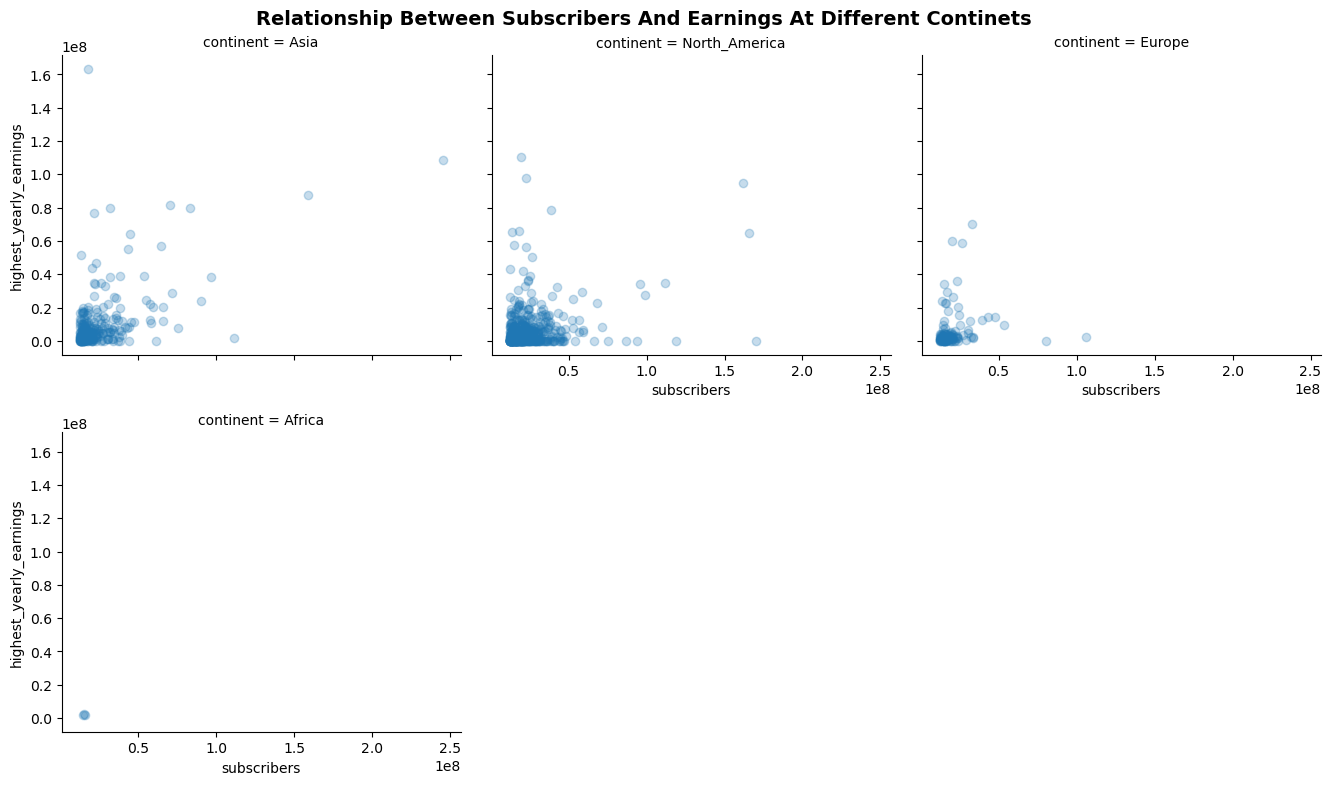

In [69]:
#Continent, subs, earnings

'''
 'rank', 'subscribers', 'video views', 'uploads', 'lowest_monthly_earnings',
   'highest_monthly_earnings', 'lowest_yearly_earnings','highest_yearly_earnings'
   '''

g = sns.FacetGrid(data=df_clean, col='continent', col_wrap = 3)
g.map(plt.scatter, 'subscribers', 'highest_yearly_earnings', alpha=0.25)
g.set_xlabels('subscribers')
g.set_ylabels('highest_yearly_earnings')
g.fig.set_size_inches(14,8);
plt.suptitle('Relationship between Subscribers and earnings at different continets'.title(), y=1, fontsize=14, weight='bold')
plt.show();
